# Final Project - German Credit Card Dataset
### by Ackah Blay

In [1]:
#Donwload library pip install pydotplus
#Download graphviz library

#Importing libraries necessary for analysis and modelling

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc, recall_score, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#load dataset
mydata = pd.read_csv('german_credit_card.csv')

In [3]:
mydata.columns = mydata.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [4]:
mydata = mydata.reindex(['account_balance', 'duration_of_credit_month',
                         'payment_status_of_previous_credit', 'purpose','credit_amount',
                         'value_savings/stocks', 'length_of_current_employment', 
                         'instalment_per_cent', 'sex_&_marital_status','guarantors',
                         'duration_in_current_address', 'most_valuable_available_asset',
                         'age_years','concurrent_credits','type_of_apartment',
                         'no_of_credits_at_this_bank', 'occupation','no_of_dependents',
                         'telephone','foreign_worker', 'creditability'], axis = 1)
#read in dataset from local file
mydata.head(5)

,account_balance,duration_of_credit_month,payment_status_of_previous_credit,purpose,credit_amount,value_savings/stocks,length_of_current_employment,instalment_per_cent,sex_&_marital_status,guarantors,...,most_valuable_available_asset,age_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker,creditability
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,1,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,2,1,1,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,1,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,2,1,2,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,1,1,2,1


In [5]:
#take a sample of data to ensure proper reading of data
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
account_balance                      1000 non-null int64
duration_of_credit_month             1000 non-null int64
payment_status_of_previous_credit    1000 non-null int64
purpose                              1000 non-null int64
credit_amount                        1000 non-null int64
value_savings/stocks                 1000 non-null int64
length_of_current_employment         1000 non-null int64
instalment_per_cent                  1000 non-null int64
sex_&_marital_status                 1000 non-null int64
guarantors                           1000 non-null int64
duration_in_current_address          1000 non-null int64
most_valuable_available_asset        1000 non-null int64
age_years                            1000 non-null int64
concurrent_credits                   1000 non-null int64
type_of_apartment                    1000 non-null int64
no_of_credits_at_this_bank           10

In [6]:
#Summary statistics of numerical data
mydata.describe()

,account_balance,duration_of_credit_month,payment_status_of_previous_credit,purpose,credit_amount,value_savings/stocks,length_of_current_employment,instalment_per_cent,sex_&_marital_status,guarantors,...,most_valuable_available_asset,age_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker,creditability
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


## 1. Data Preparation and Pre-prediction analysis

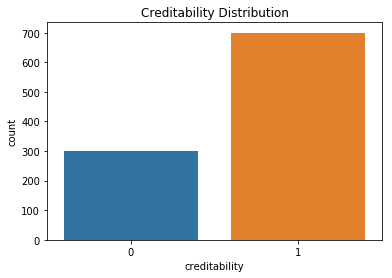

In [7]:
#identifying skew in Y variable
sns.countplot('creditability', data=mydata)
plt.title('Creditability Distribution', fontsize=12)
plt.show();

The dataset has an imbalanced class distribution. There are 300 records with 'bad' creditability and 700 with 'good' creditability.

Next, let's have a look at the individual distribution of each feature using histograms

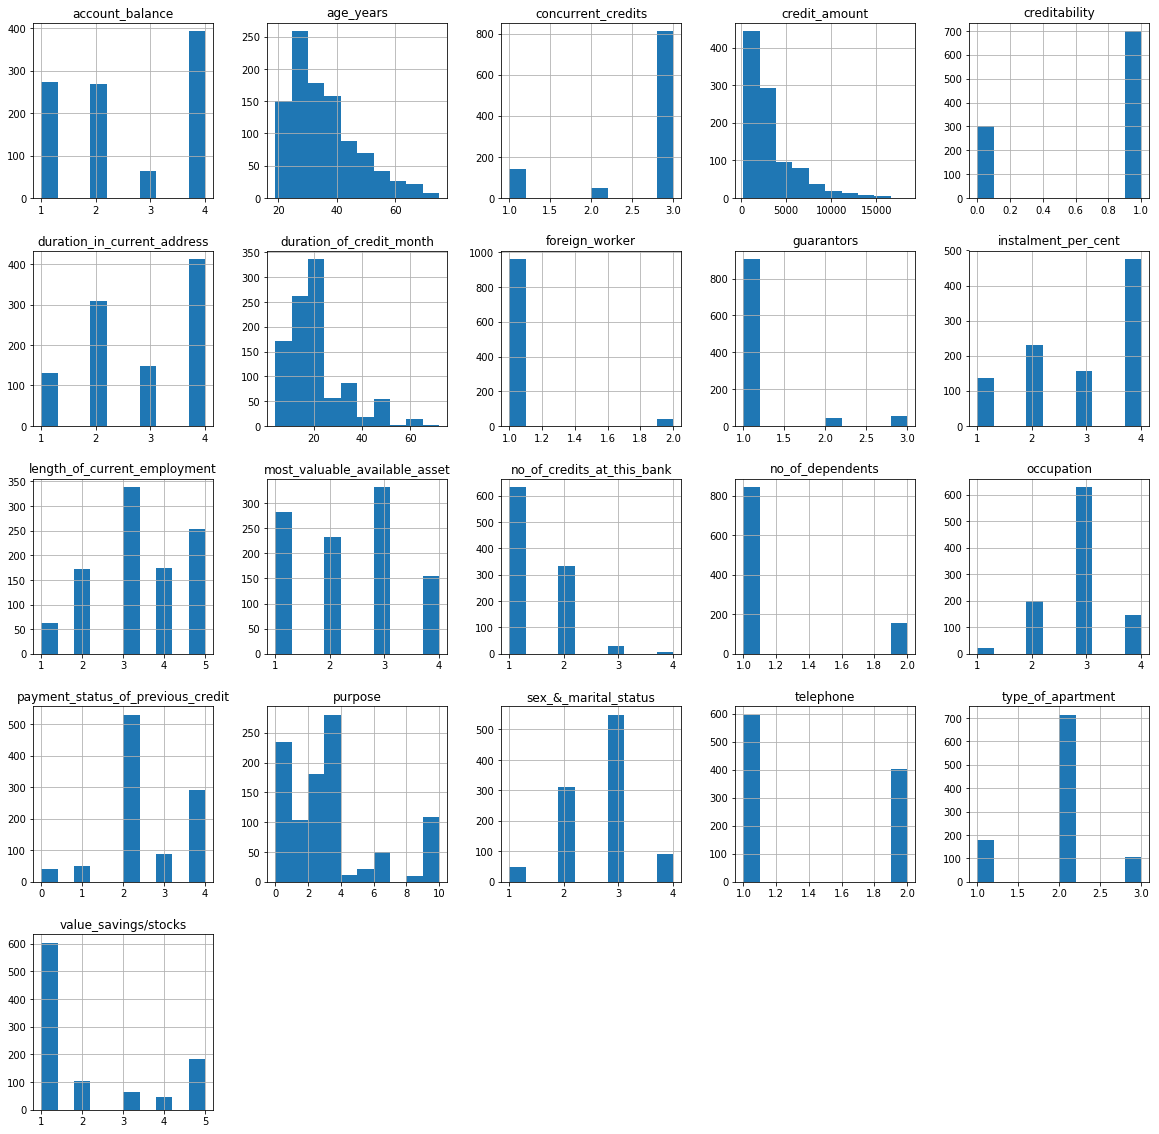

In [8]:
#visualizing data to understand distribution of features
mydata.hist(figsize = (20,20))
plt.show();

### Taking a closer look at Quantitative/Numerical Features in relation to the target variable - Creditability: 
1. Duration of Credit
2. Credit Amount
3. Age

### Duration of Credit

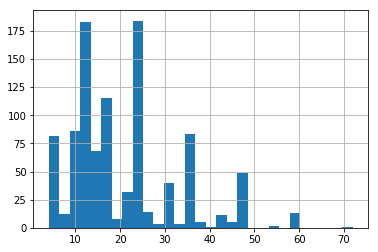

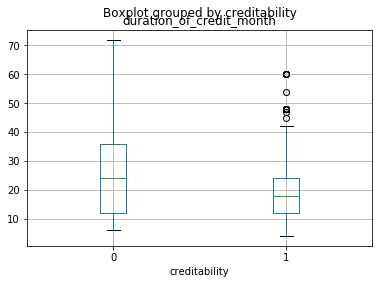

In [9]:
#Outlier identified in duration of credit month, however maintain current structure 
#since dropping outliers will further diminish weight of "credible" data points
mydata.duration_of_credit_month.hist(bins='auto')
mydata.boxplot(column='duration_of_credit_month', by= "creditability")
plt.show();

### Credit Amount

C:\Users\shail\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


(1000, 19000)

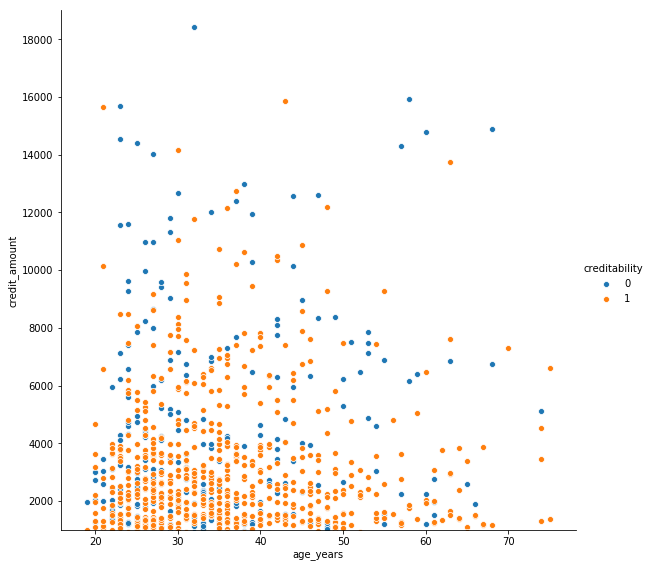

In [10]:
sns.pairplot(x_vars=["age_years"], y_vars=["credit_amount"], data=mydata, 
hue="creditability", size=8)
plt.gca().set_ylim((1000, 19000))

The higher the credit amount, the more likely we are to find creditability of 0.

C:\Users\shail\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


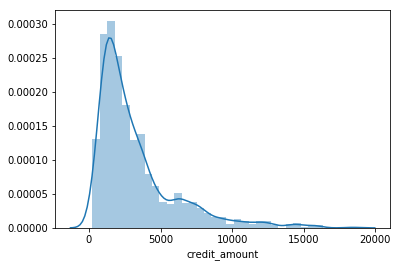

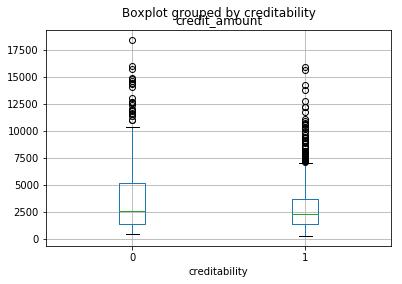

In [11]:
#Trim outliers and replace with median since distribution is skewed
sns.distplot(mydata['credit_amount'])
plt.show()
mydata.boxplot(column='credit_amount', by= "creditability")

In [12]:
mydata['credit_amount'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      250.0
0.1      934.7
0.2     1262.0
0.3     1479.4
0.4     1906.8
0.5     2319.5
0.6     2852.4
0.7     3590.0
0.8     4720.0
0.9     7179.4
1.0    18424.0
Name: credit_amount, dtype: float64

In [13]:
mydata.credit_amount.median()

2319.5

In [14]:
mydata.loc[(mydata.credit_amount > 8471.96), 'credit_amount'] = 2319

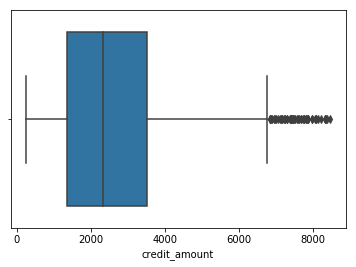

In [15]:
sns.boxplot(mydata['credit_amount'])
plt.show()

### Age

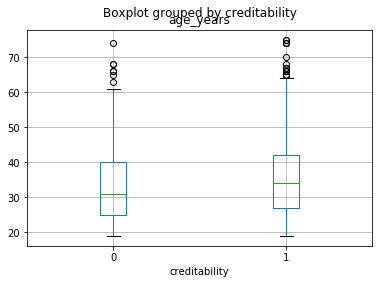

In [16]:
#Trim outliers and replace with median since distribution is skewedsns.distplot(mydata['age_years'])
plt.show()
mydata.boxplot(column='age_years', by= "creditability")

In [17]:
#because data is skewed -- best measure for central 
mydata.age_years.median()

33.0

In [18]:
#replacing outliers by median
mydata.loc[(mydata.age_years > 68), 'age_years'] = 33.0

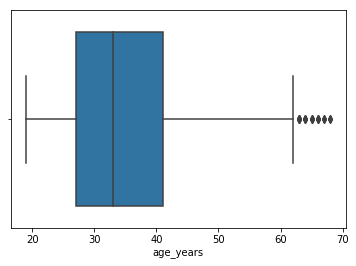

In [19]:
sns.boxplot(mydata['age_years'])
plt.show()

### Observations on continuous features
The histograms and boxplots of continuous variables reveal that there is a right skewed nearly normal trend seen across credit amount and age categories. 
- The 25-35 age range is where people in the sample seem to be borrowing the most. 
- The most common credit amount is within the 1000-2500 range.
- The duration of credit varies more but is usually between 10-25 years.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 <a list of 21 Text xticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 <a list of 21 Text yticklabel objects>)

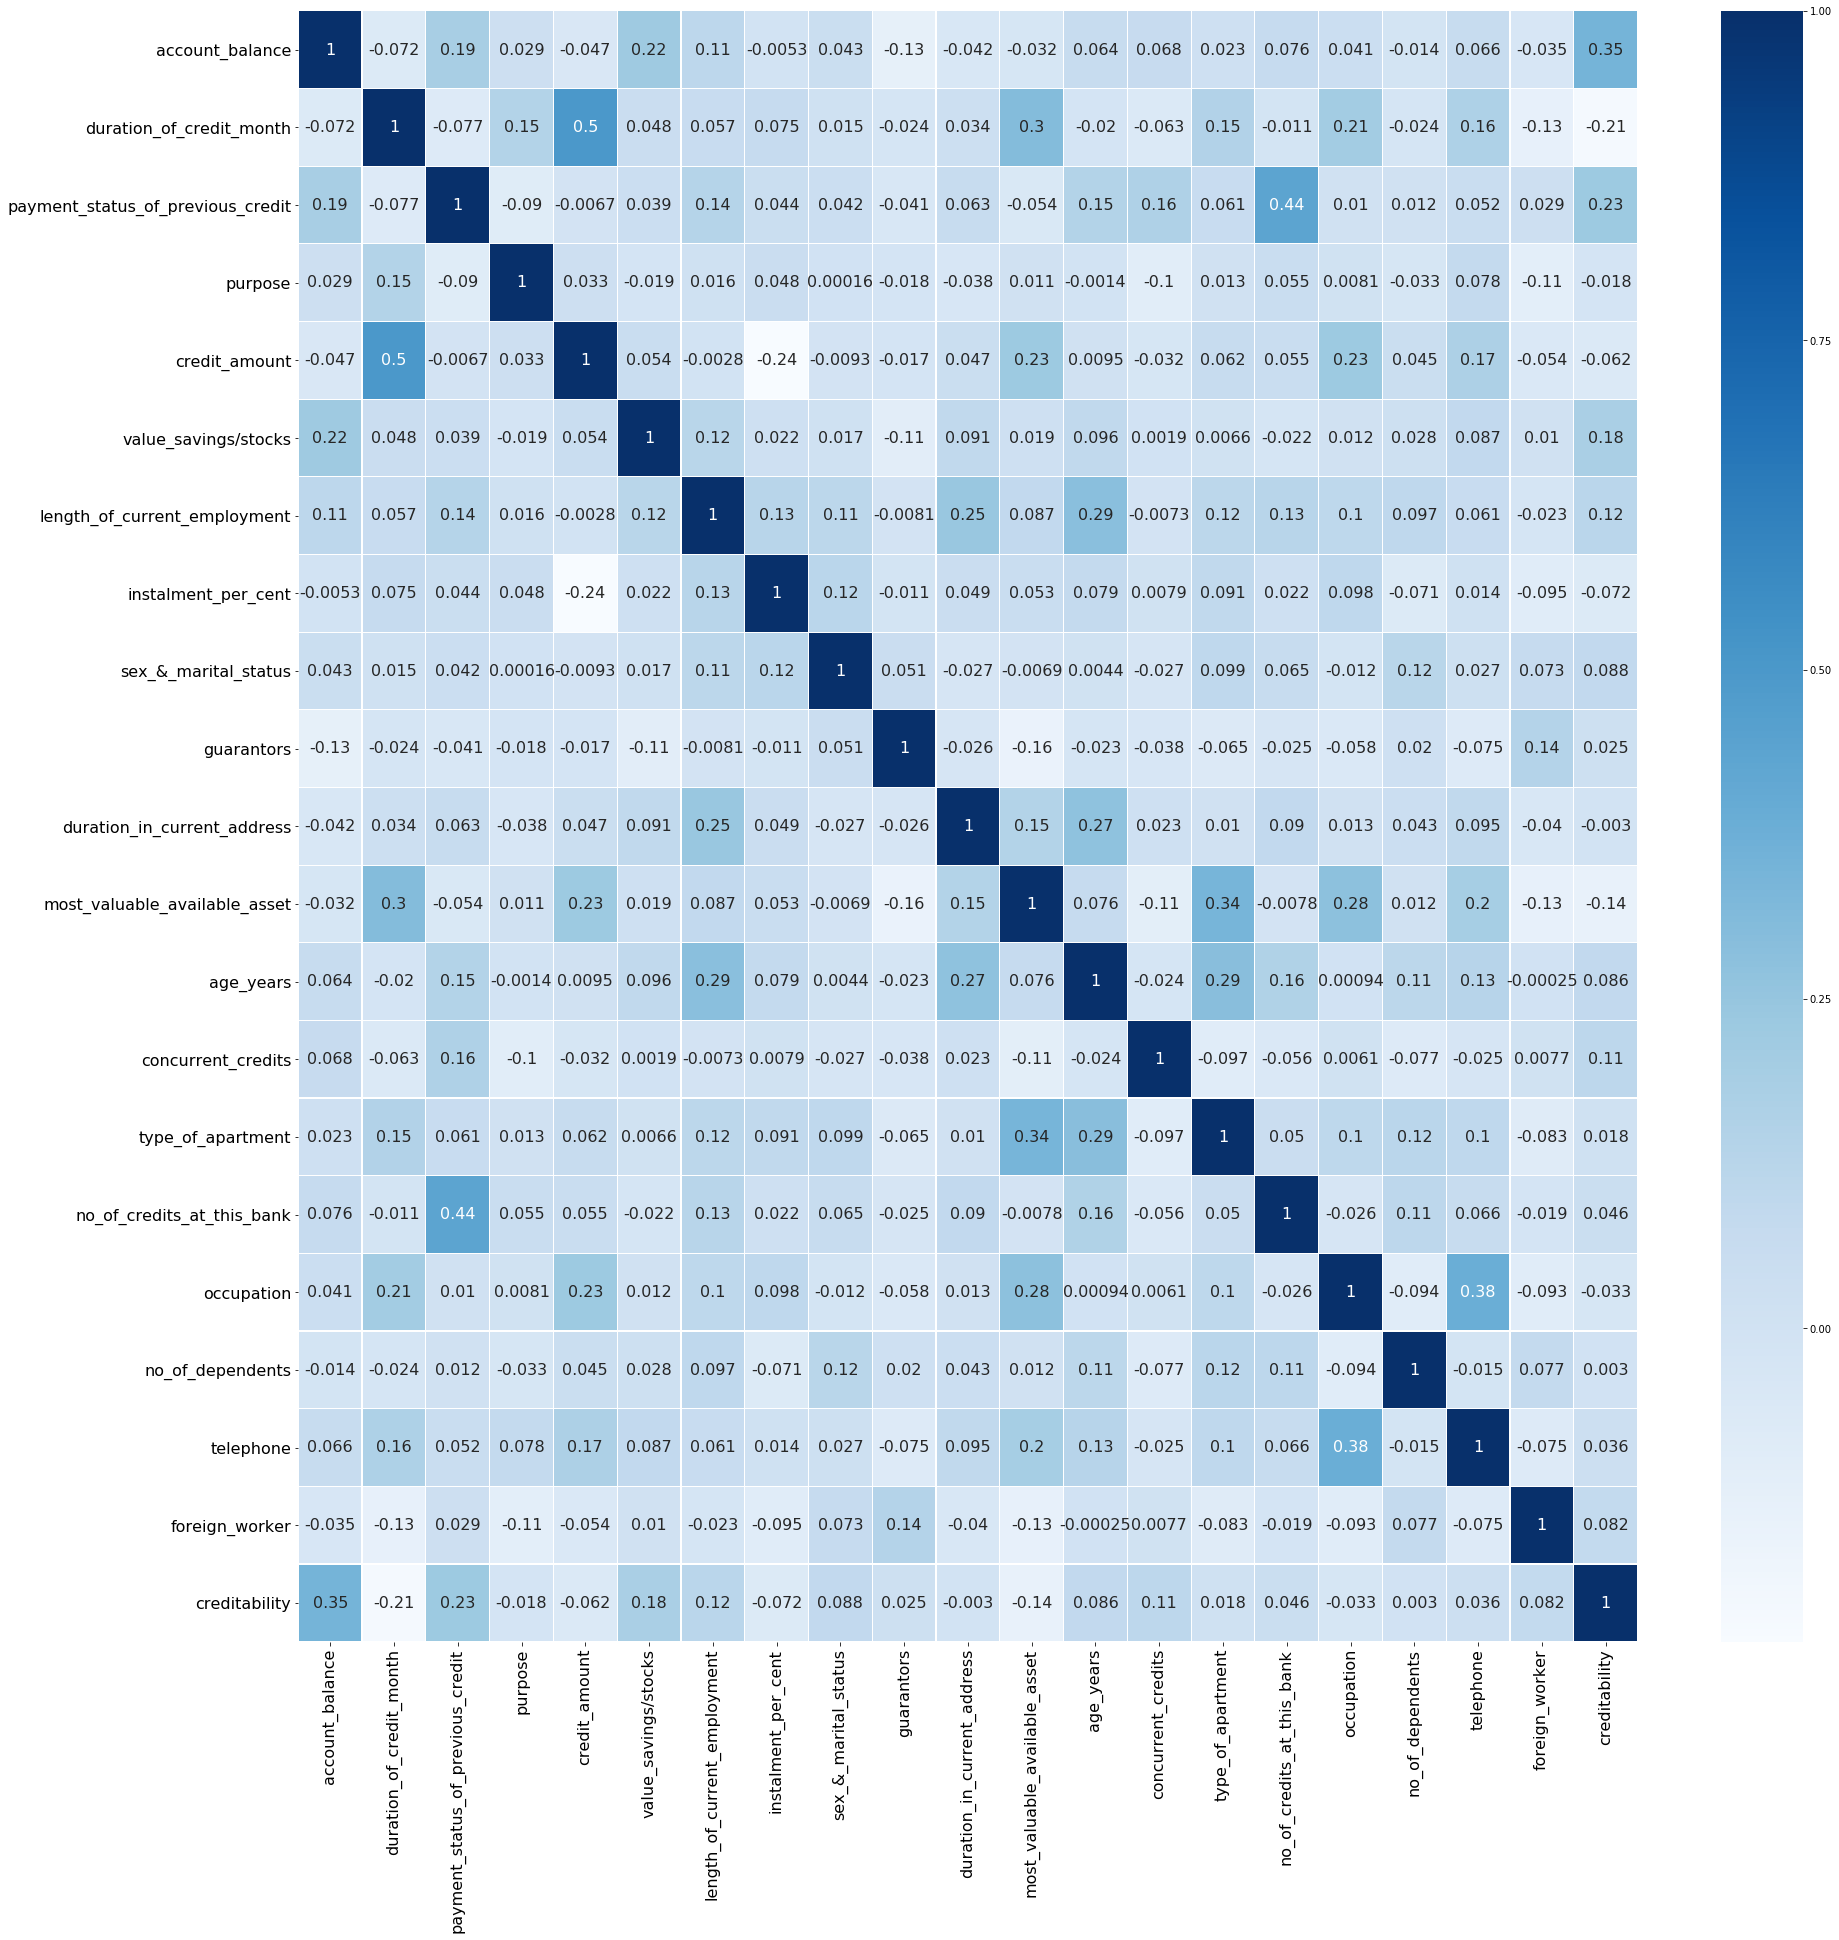

In [20]:
#correlation matrix to identify features that are strongly linked with credibility
sns.heatmap(mydata.corr(),annot=True,cmap='Blues',linewidths=0.2,annot_kws={'size':16})
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

There is little to no linear relationship between the class variable Creditability and the 20 features. 
The most significant feature using a correlation matrix is the account balance. 
Since most features are categorical, we will be using classification models rather than regression models.

In [21]:
#Order of attribute by importance based on cleaned data, outliers in age and credit amount trimmed
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(0)
array = mydata.values
X1 = array[:,0:20]
Y1 = array[:,20]

model = ExtraTreesClassifier()
model.fit(X1,Y1)
print(model.feature_importances_)

C:\Users\shail\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

[0.12670465 0.08057005 0.06263032 0.0597618  0.07168326 0.04998225
 0.05999239 0.05348418 0.04075816 0.02755099 0.05025798 0.05501099
 0.06641465 0.03237918 0.03299566 0.03364407 0.03905493 0.02136963
 0.02893904 0.00681581]


In [22]:
mydata.columns[:21]

Index(['account_balance', 'duration_of_credit_month',
       'payment_status_of_previous_credit', 'purpose', 'credit_amount',
       'value_savings/stocks', 'length_of_current_employment',
       'instalment_per_cent', 'sex_&_marital_status', 'guarantors',
       'duration_in_current_address', 'most_valuable_available_asset',
       'age_years', 'concurrent_credits', 'type_of_apartment',
       'no_of_credits_at_this_bank', 'occupation', 'no_of_dependents',
       'telephone', 'foreign_worker', 'creditability'],
      dtype='object')

## 2. Predictive Modelling (Classification)

In [23]:
#Complete dataset
#Split dataset into train and test sets 67/33
X = mydata.iloc[:,0:20].values  
y = mydata.iloc[:,20].values  
seed=10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = seed)
train_size = len(X_train)
test_size = len(X_test)

First off, let's calculate the null accuracy (baseline against which to measure our models)
The null accuracy is the accuracy that could be achieved by always predicting the most frequent class in the testing set.

In [24]:
null = max(y_test.mean(), 1-y_test.mean())
print ('Null accuracy:',null)

Null accuracy: 0.6878787878787879


## 2.1 Decision Tree

In [25]:
basic_dt = DecisionTreeClassifier()
basic_dt.fit(X_train, y_train)
y_pred = basic_dt.predict(X_test)

print( "Accuracy Score:" , accuracy_score(y_test, y_pred, normalize = True))
print( "Precision Score:" , precision_score(y_test, y_pred, average = 'weighted'))
print( "Recall Score:" , recall_score(y_test, y_pred))
print( "F1 score:" , f1_score(y_test, y_pred))

print( '\nConfusion matrix:\n',confusion_matrix(y_test, y_pred))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Accuracy Score: 0.6696969696969697
Precision Score: 0.6603467078531018
Recall Score: 0.7841409691629956
F1 score: 0.7655913978494624

Confusion matrix:
 [[ 43  60]
 [ 49 178]]


Null accuracy outperforms a basic decision tree model with the default parmeters.
Now let's use GridsearchCV to determine which parameters are best suited for our data.

In [26]:
#GridSearchCV with 10-fold cv
param_dist = {"max_depth": range(1,50), 'min_samples_leaf': range(1,20), "criterion":["gini","entropy"]}
gtree_10fold = DecisionTreeClassifier(random_state=7)
grid = GridSearchCV(gtree_10fold, param_dist, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
grid.cv_results_

C:\Users\shail\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 50), 'min_samples_leaf': range(1, 20), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

C:\Users\shail\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\shail\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\shail\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

{'mean_fit_time': array([0.00156305, 0.        , 0.00045192, ..., 0.00344036, 0.00329256,
        0.00270951]),
 'std_fit_time': array([0.00173414, 0.        , 0.00056226, ..., 0.00151597, 0.001325  ,
        0.0016309 ]),
 'mean_score_time': array([0.00037072, 0.0015677 , 0.00046816, ..., 0.0005203 , 0.00035827,
        0.00092709]),
 'std_score_time': array([0.00065239, 0.00470309, 0.00112064, ..., 0.00068142, 0.00046728,
        0.00115329]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., 49, 49, 49],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 2, 3, ..., 17, 18, 19],
              mask=[False, False, False, ..., Fal

In [27]:
#creating list of mean scores
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.70597015 0.70597015 0.70597015 ... 0.72835821 0.73134328 0.73283582]


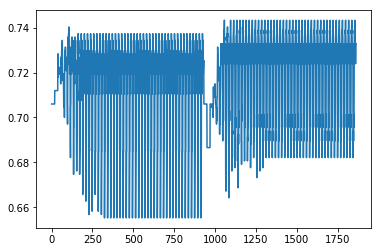

In [28]:
#Plot of 10-fold cv
plt.plot(range(1,1863),grid_mean_scores)

In [29]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7432835820895523
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 12}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=12, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')


### Observations on GridSearchCV for Decision Tree
Best score: 0.7432835820895523
Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 12}

Therefore, tailoring the parameters of the decision tree helps us gain in accuracy of prediction.
Now, we use these parameters in our new decision tree model.
We consider two decision tree models:
1. without accounting for imbalanced class - Dtree_imbalanced
2. by accounting for imbalance using the class_weight parameter - Dtree_balanced

In [30]:
#without accounting for imbalanced data
seed = 10
Dtree_imbalanced = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf = 12, random_state= seed, min_samples_split = 100)
Dtree_imbalanced.fit(X_train, y_train)
y_pred = Dtree_imbalanced.predict(X_test)

print( "Accuracy Score:" , accuracy_score(y_test, y_pred, normalize = True))
print( "Precision Score:" , precision_score(y_test, y_pred, average = 'weighted'))
print( "Recall Score:" , recall_score(y_test, y_pred))
print( "F1 Score:" , f1_score(y_test, y_pred))

print( '\nConfusion matrix:\n',confusion_matrix(y_test, y_pred))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=12, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

Accuracy Score: 0.706060606060606
Precision Score: 0.7022793913803765
Recall Score: 0.7973568281938326
F1 Score: 0.7886710239651415

Confusion matrix:
 [[ 52  51]
 [ 46 181]]


In [31]:
#using class_weight parameter
seed = 10
Dtree_balanced = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf = 12, random_state= seed, 
                                           min_samples_split = 100, class_weight={0:3,1:7})
Dtree_balanced.fit(X_train, y_train)
y_pred = Dtree_balanced.predict(X_test)

print( "Accuracy Score:" , accuracy_score(y_test, y_pred, normalize = True))
print( "Precision Score:" , precision_score(y_test, y_pred, average = 'weighted'))
print( "Recall Score:" , recall_score(y_test, y_pred))
print( "F1 Score:" , f1_score(y_test, y_pred))

print( '\nConfusion matrix:\n',confusion_matrix(y_test, y_pred))

DecisionTreeClassifier(class_weight={0: 3, 1: 7}, criterion='entropy',
            max_depth=7, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=12, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

Accuracy Score: 0.7212121212121212
Precision Score: 0.7134539344643595
Recall Score: 0.960352422907489
F1 Score: 0.8257575757575757

Confusion matrix:
 [[ 20  83]
 [  9 218]]


### Comparing Dtree_imbalanced and Dtree_balanced
We can see there is a tradeoff between false negatives and false positives when balancing the creditability ratio.
In the case of the credit card dataset, false negatives and false positives both result in a loss for the bank. However, false positives can be remedied through collaterals, guarantors etc whereas false negatives cannot be corrected. So in this case, the balanced decision tree is the best.

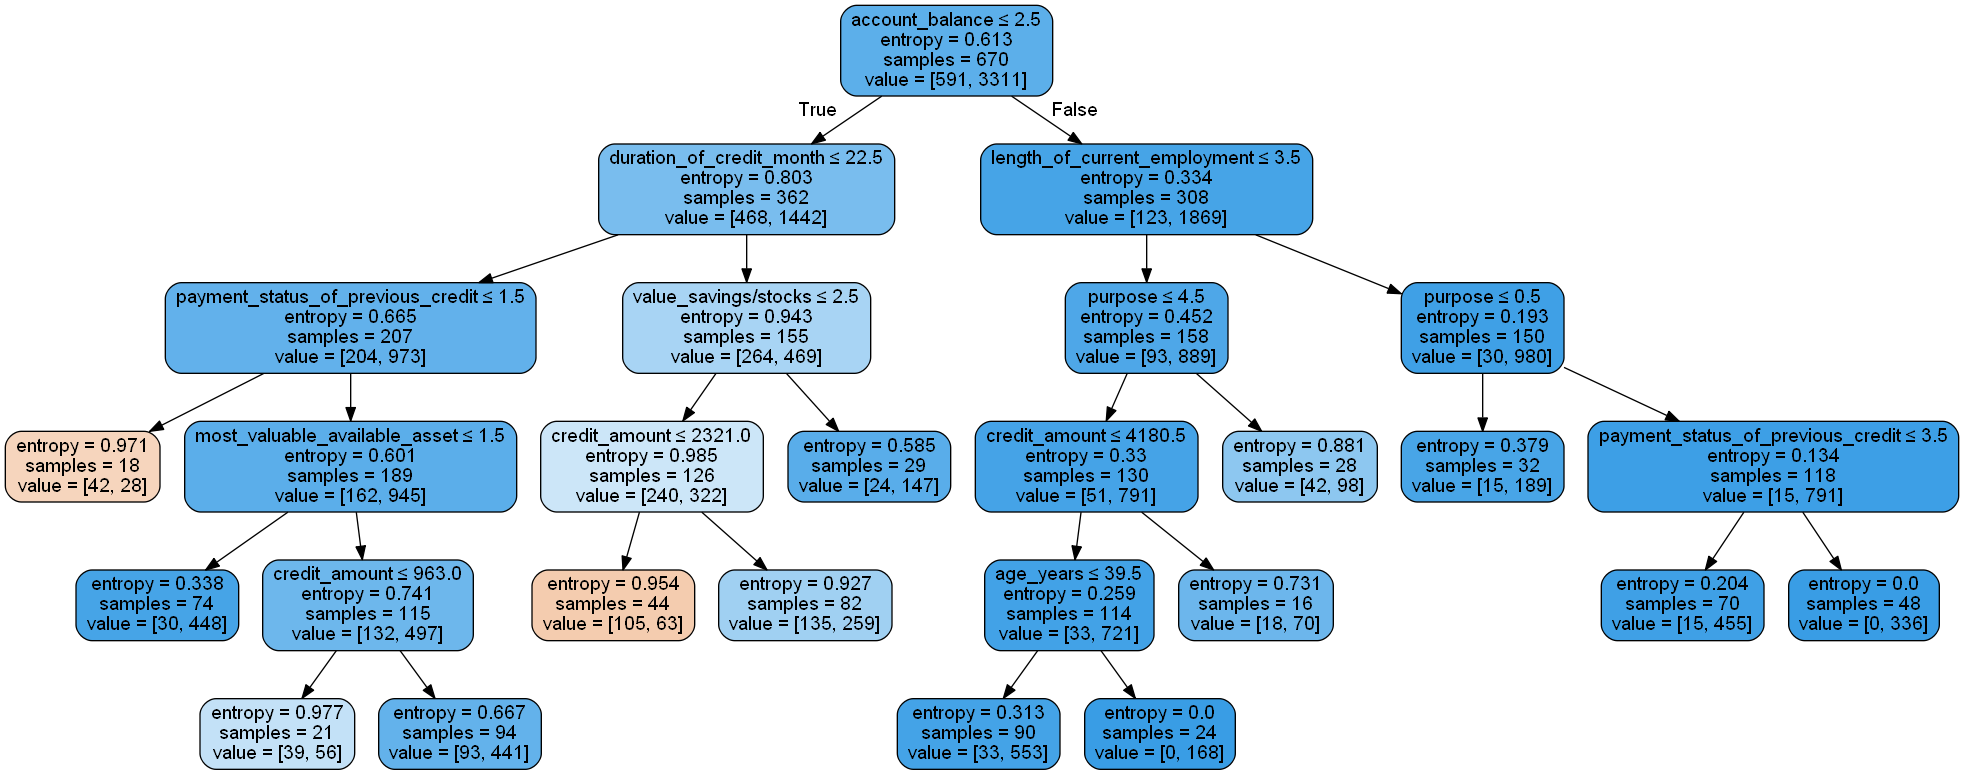

In [32]:
#Visualizing the decision tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
X_names=['account_balance', 'duration_of_credit_month',
        'payment_status_of_previous_credit', 'purpose','credit_amount',
        'value_savings/stocks', 'length_of_current_employment', 
        'instalment_per_cent', 'sex_&_marital_status','guarantors',
        'duration_in_current_address', 'most_valuable_available_asset',
        'age_years','concurrent_credits','type_of_apartment',
        'no_of_credits_at_this_bank', 'occupation','no_of_dependents',
        'telephone','foreign_worker']

dot_data = StringIO()
export_graphviz(Dtree_balanced, out_file=dot_data, feature_names=X_names, 
                filled=True, rounded=True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

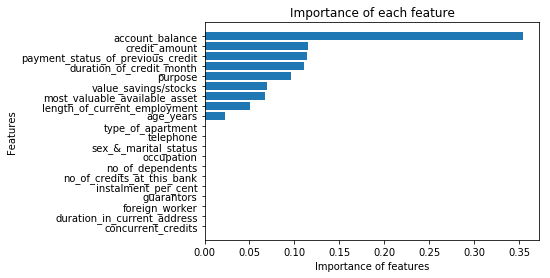

In [33]:
imp = Dtree_balanced.feature_importances_
names = mydata.columns

imp, names = zip(*sorted(zip(imp, names)))
plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)

plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show();

From feature_importances_ above, we can see that according to the balanced decision tree model the 9 features above are the most relevant to predict creditability. Those are the features we will consider in the Naive Bayes and Random Forest Classifier in order to compare models.

In [34]:
#Decision Tree 5Fold

Dtree_5Fold=cross_val_score (Dtree_balanced, X=X_train, y=y_train, cv=5, scoring='accuracy')

print(Dtree_5Fold)   
print(Dtree_5Fold.mean())

[0.67407407 0.7037037  0.73880597 0.7518797  0.69924812]
0.7135423134951808


In [35]:
#Decision Tree 10Fold

Dtree_10Fold=cross_val_score (Dtree_balanced, X=X_train, y=y_train, cv=10, scoring='accuracy')

print(Dtree_10Fold)   
print(Dtree_10Fold.mean())

[0.75       0.72058824 0.70588235 0.68656716 0.74626866 0.74626866
 0.68656716 0.71212121 0.72727273 0.75757576]
0.7239111926996037


## 2.2 Naive Bayes

In [36]:
#Simple train and test 67/33 on full dataset
#Naive Bayes classifier

NBayes_full = GaussianNB()
NBayes_full.fit(X_train, y_train)
y_pred = NBayes_full.predict(X_test)

#print("Confusion matrix:\n%s" % df_table)
print("Accuracy Score:", accuracy_score(y_test, y_pred, normalize = True))
print("Precision Score:", precision_score(y_test, y_pred, average = 'weighted'))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:" , f1_score(y_test, y_pred))
print('\nConfusion matrix:\n',confusion_matrix(y_test, y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy Score: 0.7333333333333333
Precision Score: 0.7602788697632407
Recall Score: 0.7400881057268722
F1 Score: 0.7924528301886793

Confusion matrix:
 [[ 74  29]
 [ 59 168]]


In [37]:
#Cross validation on full dataset - 5 fold
#Naive_bayes
from sklearn.preprocessing import StandardScaler  
feature_scaler = StandardScaler()  
train_features = feature_scaler.fit_transform(X_train)  
test_features = feature_scaler.transform(X_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

from sklearn.model_selection import cross_val_score  
NBayes_full_5Fold = cross_val_score(estimator=classifier, X=train_features, y=y_train, cv=5) 

print(NBayes_full_5Fold)  
print(NBayes_full_5Fold.mean()) 

[0.64444444 0.31851852 0.69402985 0.70676692 0.69172932]
0.611097810862147


In [38]:
#Cross validation on full dataset - 10 fold
#Naive_bayes
classifier = GaussianNB()
from sklearn.model_selection import cross_val_score  
NBayes_full_10Fold = cross_val_score(estimator=classifier, X=train_features, y=y_train, cv=10) 

print(NBayes_full_10Fold)  
print(NBayes_full_10Fold.mean()) 

[0.61764706 0.69117647 0.76470588 0.32835821 0.64179104 0.71641791
 0.74626866 0.66666667 0.65151515 0.74242424]
0.6566971293266289


### Considering only features selected by Decision Tree

In [39]:
mydata_new1 = mydata[['credit_amount','no_of_dependents', 'payment_status_of_previous_credit', 
'duration_of_credit_month','purpose','value_savings/stocks','most_valuable_available_asset',
'length_of_current_employment','age_years','creditability']]

In [40]:
#Split dataset into train and test sets
X1 = mydata_new1.values[:,:9]
y1 = mydata_new1.values[:,9]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.33,
                                                                             random_state = seed)

In [41]:
#simple train and test using 67/33 split
#Naive Bayes classifier
NBayes_trimmed = GaussianNB()
NBayes_trimmed.fit(X1_train, y1_train)
y1_pred = NBayes_trimmed.predict(X1_test)
df_table = confusion_matrix(y1_test, y1_pred)

#print("Confusion matrix:\n%s" % df_table)
print("Accuracy Score:", accuracy_score(y1_test, y1_pred, normalize = True))
print("Precision Score:", precision_score(y1_test, y1_pred, average = 'weighted'))
print("Recall Score:", recall_score(y1_test, y1_pred))
print("F1 Score:" , f1_score(y1_test, y1_pred))
print('\nConfusion matrix:\n',confusion_matrix(y1_test, y1_pred))

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy Score: 0.7090909090909091
Precision Score: 0.6893478808971767
Recall Score: 0.8590308370044053
F1 Score: 0.8024691358024693

Confusion matrix:
 [[ 39  64]
 [ 32 195]]


In [42]:
#Cross validation 5 fold
#Naive_bayes
from sklearn.preprocessing import StandardScaler  
feature_scaler = StandardScaler()  
train_features = feature_scaler.fit_transform(X1_train)  
test_features = feature_scaler.transform(X1_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

from sklearn.model_selection import cross_val_score  
NBayes_trimmed_5Fold = cross_val_score(estimator=classifier, X=train_features, y=y1_train, cv=5) 

print(NBayes_trimmed_5Fold)  
print(NBayes_trimmed_5Fold.mean()) 

[0.67407407 0.71851852 0.75373134 0.72180451 0.71428571]
0.7164828322880169


In [43]:
#Cross validation 10 fold
#Naive_bayes

from sklearn.model_selection import cross_val_score  
NBayes_trimmed_10Fold = cross_val_score(estimator=classifier, X=train_features, y=y1_train, cv=10) 

print(NBayes_trimmed_10Fold)  
print(NBayes_trimmed_10Fold.mean())

[0.69117647 0.63235294 0.75       0.70149254 0.76119403 0.74626866
 0.68656716 0.71212121 0.6969697  0.74242424]
0.7120566951339559


## 2.3 Random Forest Classifier

In [44]:
#full dataset
seed = 10
RForest_full = RandomForestClassifier(n_estimators=300, random_state=seed)
RForest_full.fit(X_train, y_train)
y_pred = RForest_full.predict(X_test)

print( "Accuracy Score:" , accuracy_score(y_test, y_pred, normalize = True))
print( "Precision Score:" , precision_score(y_test, y_pred, average = 'weighted'))
print( "Recall Score:" , recall_score(y_test, y_pred))
print( "F1 Score:" , f1_score(y_test, y_pred))

print( '\nConfusion matrix:\n',confusion_matrix(y_test, y_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

Accuracy Score: 0.7787878787878788
Precision Score: 0.7715679522497704
Recall Score: 0.920704845814978
F1 Score: 0.8513238289205701

Confusion matrix:
 [[ 48  55]
 [ 18 209]]


In [45]:
#Cross validation on full dataset - 5 fold
#RandomForestClassifier
  
RForest_full_5Fold = cross_val_score(RForest_full, X=X_train, y=y_train, cv=5) 

print(RForest_full_5Fold)  
print(RForest_full_5Fold.mean())

[0.6962963  0.75555556 0.73880597 0.7518797  0.78195489]
0.7448984816934542


In [46]:
#Cross validation on full dataset - 10 fold
#RandomForestClassifier

RForest_full_10Fold = cross_val_score(RForest_full, X=X_train, y=y_train, cv=10) 

print(RForest_full_10Fold)  
print(RForest_full_10Fold.mean()) 

[0.67647059 0.70588235 0.80882353 0.82089552 0.71641791 0.76119403
 0.79104478 0.72727273 0.74242424 0.81818182]
0.7568607497272993


### Considering only features selected by Decision Tree

In [47]:
#simple train and test using 67/33 split
#Random Forest Classifier trimmed data
RForest_trimmed= RandomForestClassifier(n_estimators = 300, random_state=seed)
RForest_trimmed.fit(X1_train, y1_train)
y1_pred = RForest_trimmed.predict(X1_test)
print("Accuracy Score:" , accuracy_score(y1_test, y1_pred, normalize = True))
print("Precision Score:", precision_score(y1_test, y1_pred, average = 'weighted'))
print("Recall Score:", recall_score(y1_test, y1_pred))
print("F1 Score:" , f1_score(y1_test, y1_pred))
print('\nConfusion matrix:\n',confusion_matrix(y1_test, y1_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

Accuracy Score: 0.7606060606060606
Precision Score: 0.7498875028480292
Recall Score: 0.9118942731277533
F1 Score: 0.8397565922920892

Confusion matrix:
 [[ 44  59]
 [ 20 207]]


In [48]:
#Cross validation 5 fold trimmed data
#RandomForestClassifier
RForest_trimmed_5Fold = cross_val_score(RForest_trimmed, X=X1_train, y=y1_train, cv=5) 

print(RForest_trimmed_5Fold)  
print(RForest_trimmed_5Fold.mean())

[0.7037037  0.74814815 0.75373134 0.72180451 0.72180451]
0.7298384435383649


In [49]:
RForest_trimmed_10Fold = cross_val_score(RForest_trimmed, X=X1_train, y=y1_train, cv=10) 

print(RForest_trimmed_10Fold)  
print(RForest_trimmed_10Fold.mean())

[0.73529412 0.60294118 0.76470588 0.68656716 0.7761194  0.73134328
 0.67164179 0.6969697  0.65151515 0.77272727]
0.7089824939473754


### Comparing performance scores and ROC across models

The aim of the project is to determine which attributes can best determine creditworthiness. 
To a bank issuing credit cards, a false negative results in a loss in terms of sale and a false positive results in a loss in terms of debts not paid. Therefore, the best measure of performance for the model is the F1 Score. The F1 score is the weighted average of Precision and Recall. It takes both false positives and false negatives into account.

In [50]:
y_pred = Dtree_balanced.predict(X_test)
print( "F1 Score balanced Decision Tree:" , f1_score(y_test, y_pred))

y_pred = NBayes_full.predict(X_test)
print( "F1 Score Naive Bayes full dataset:" , f1_score(y_test, y_pred))

y_pred = NBayes_trimmed.predict(X1_test)
print( "F1 Score Naive Bayes trimmed datatset:" , f1_score(y1_test, y1_pred))

y_pred = RForest_full.predict(X_test)
print( "F1 Score Random Forest full dataset:" , f1_score(y_test, y_pred))

y_pred = RForest_trimmed.predict(X1_test)
print( "F1 Score Random Forest trimmed dataset:" , f1_score(y1_test, y1_pred))

F1 Score balanced Decision Tree: 0.8257575757575757
F1 Score Naive Bayes full dataset: 0.7924528301886793
F1 Score Naive Bayes trimmed datatset: 0.8397565922920892
F1 Score Random Forest full dataset: 0.8513238289205701
F1 Score Random Forest trimmed dataset: 0.8397565922920892


Random Forest on full data set returns the best f1 score.

In [51]:
# Model accuracy scores

y_pred = Dtree_balanced.predict(X_test)
print( "Balanced Decision Tree:" , accuracy_score(y_test, y_pred))

print("Decision Tree 5Fold:",Dtree_5Fold.mean())  
print("Decision Tree 10Fold:",Dtree_10Fold.mean())
print()
y_pred = NBayes_full.predict(X_test)
print( "Naive Bayes full dataset:" , accuracy_score(y_test, y_pred))
print("Naive Bayes 5Fold:",NBayes_full_5Fold.mean()) 
print("Naive Bayes 10Fold:", NBayes_full_10Fold.mean())
y_pred = NBayes_trimmed.predict(X1_test)
print( "Naive Bayes trimmed datatset:" , accuracy_score(y1_test, y1_pred))
print("Naive Bayes 5Fold:",NBayes_trimmed_5Fold.mean()) 
print("Naive Bayes 10Fold:", NBayes_trimmed_10Fold.mean())
print()
y_pred = RForest_full.predict(X_test)
print( "Random Forest full dataset:" , accuracy_score(y_test, y_pred))
print("Random Forest 5Fold:" ,RForest_full_5Fold.mean()) 
print("Random Forest 10Fold:" ,RForest_full_10Fold.mean())
y_pred = RForest_trimmed.predict(X1_test)
print( "Random Forest trimmed dataset:" , accuracy_score(y1_test, y1_pred))
print("Random Forest 5Fold:" ,RForest_trimmed_5Fold.mean()) 
print("Random Forest 10Fold:" ,RForest_trimmed_10Fold.mean())

Balanced Decision Tree: 0.7212121212121212
Decision Tree 5Fold: 0.7135423134951808
Decision Tree 10Fold: 0.7239111926996037

Naive Bayes full dataset: 0.7333333333333333
Naive Bayes 5Fold: 0.611097810862147
Naive Bayes 10Fold: 0.6566971293266289
Naive Bayes trimmed datatset: 0.7606060606060606
Naive Bayes 5Fold: 0.7164828322880169
Naive Bayes 10Fold: 0.7120566951339559

Random Forest full dataset: 0.7787878787878788
Random Forest 5Fold: 0.7448984816934542
Random Forest 10Fold: 0.7568607497272993
Random Forest trimmed dataset: 0.7606060606060606
Random Forest 5Fold: 0.7298384435383649
Random Forest 10Fold: 0.7089824939473754


Cross validation scores for 5 fold and 10 fold are consistent with accuracy scores on tests sets so model is generalized.

<Figure size 432x288 with 0 Axes>

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

DecisionTreeClassifier(class_weight={0: 3, 1: 7}, criterion='entropy',
            max_depth=7, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=12, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

GaussianNB(priors=None, var_smoothing=1e-09)

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, '1-Specificity(False Positive Rate)')

Text(0, 0.5, 'Sensitivity(True Positive Rate)')

Text(0.5, 1.0, 'ROC comparison')

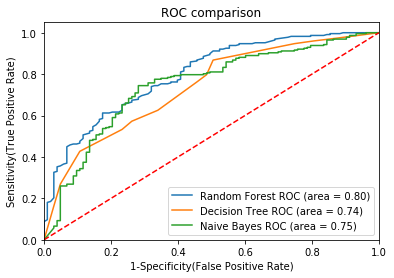

In [52]:
plt.figure()

models = [
{
    'label': 'Random Forest',
    'model': RForest_full,
},
{
    'label': 'Decision Tree',
    'model': Dtree_balanced,
},
{   'label': 'Naive Bayes',
    'model': NBayes_full,
}
]
for m in models:
    model = m['model']
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test)
    y_pred_proba=model.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test,y_pred_proba)
    plt.plot(fpr, tpr, label= '%s ROC (area = %0.2f)' % (m['label'], auc)) 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('ROC comparison')
plt.legend(loc="lower right")
plt.show()

The Random Forest model has the highest AUC value.
Although Decision Tree and Naive Bayes have the same AUC, they have different ROC curves. 
In fact, from the confusion matrix, we see that the Decision Tree model returns a higher true positive value 
but the Naive Bayes model has a higher true negative value.

### Observations
- Random Forest on full data set returns the best f1 score.
- All 3 models are generalized
- We find that the Naive Bayes Model is improved by the trimmed data set but the Random Forest Classifier is not. 
In light of the above, the best model is therefore the Random Forest Classifier on the untrimmed dataset. Let's take a closer look at the performance scores and features.

In [53]:
seed = 10
RForest_full = RandomForestClassifier(n_estimators=300, random_state=seed)
RForest_full.fit(X_train, y_train)
y_pred = RForest_full.predict(X_test)

print( "Accuracy Score:" , accuracy_score(y_test, y_pred, normalize = True))
print( "Precision Score:" , precision_score(y_test, y_pred, average = 'weighted'))
print( "Recall Score:" , recall_score(y_test, y_pred))
print( "F1 Score:" , f1_score(y_test, y_pred))

print( '\nConfusion matrix:\n',confusion_matrix(y_test, y_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

Accuracy Score: 0.7787878787878788
Precision Score: 0.7715679522497704
Recall Score: 0.920704845814978
F1 Score: 0.8513238289205701

Confusion matrix:
 [[ 48  55]
 [ 18 209]]


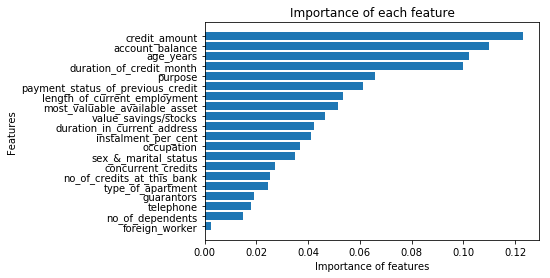

In [54]:
imp = RForest_full.feature_importances_
names = mydata.columns

imp, names = zip(*sorted(zip(imp, names)))
plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)

plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show();

In [55]:
print('\nClasification report of Random Forest on full dataset:\n', classification_report(y_test, y_pred))


Clasification report of Random Forest on full dataset:
               precision    recall  f1-score   support

           0       0.73      0.47      0.57       103
           1       0.79      0.92      0.85       227

   micro avg       0.78      0.78      0.78       330
   macro avg       0.76      0.69      0.71       330
weighted avg       0.77      0.78      0.76       330



## Conclusions and Recommendations

Preparation and pre-prediction gave us an overview of the different features but very little insight into the relationship of the features to the class variable Creditability.
The correlation matrix showed Account Balance as having the most significant correlation with Creditability.
This importance of the Account Balance feature is echoed in the Extra Trees Classifier and Decision Tree model.
The Random Forest model is the one that returned the greatest accuracy with least false positives and false negatives but it also showed the credit amount as the most important feature and used all 20 features in predicting Creditability.

Recommendations
The bank should make use of Random Forest model to determine creditability of its customers.
Offer loan to customers who rank well in the features determined by the model. The most important ones are: credit amount, account balance, age, duration of credit, purpose and payment status.
Since the risk of false postives is still present, set collaterals for customers deemed at risk according to the most important features.